Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [37]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [39]:
movies_df.drop(columns = ['homepage', 'keywords', 'original_language', 'original_title', 
'overview','production_companies', 'status', 'tagline'])

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Remove any duplicate rows

In [40]:
# Code here
movies_df.drop_duplicates()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [41]:
# Code here
movies_df.dropna()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4781,22000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",https://www.facebook.com/DrySpellMovie,255266,"[{""id"": 13043, ""name"": ""dating""}, {""id"": 15160...",en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-02-14,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",http://tincanmanthemovie.com/,157185,"[{""id"": 14903, ""name"": ""home invas

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [42]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [43]:
# Code here
movies_df['budget'].astype(np.int64)
movies_df['revenue'].astype(np.int64)

0       2787965087
1        961000000
2        880674609
3       1084939099
4        284139100
           ...    
4798       2040920
4799             0
4800             0
4801             0
4802             0
Name: revenue, Length: 4803, dtype: int64

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [44]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [45]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
2610,16000000,"['Drama', 'Thriller']",http://www.amightyheartmovie.com/,1988,"[{""id"": 321, ""name"": ""terror""}, {""id"": 917, ""n...",en,A Mighty Heart,Based on Mariane Pearl's account of the terrif...,9.717392,"[{""name"": ""Plan B Entertainment"", ""id"": 81}, {...",...,2007-01-01,18928871,100.0,"['English', 'Français', 'اردو']",Released,One woman dared to keep hope alive,A Mighty Heart,6.7,95,2007.0


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [46]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'] == 'Action']

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

The 5 most expensive and the 5 least expensive movies are printed below the code cell. The graph below the code cell also indicated a general trend of increasign revenue by increasing budget, although there are notable outliers. That being said, 4 out of 5 of the movies with the highest budgets broke the trend line by having far less revenue than their budget which means these movies did not only make no profit but made incredible losses and where therefore not worth being made, if profit is the only purpose behind movie creation. 

The graph below the second code cell, which compares budget and populairty, also shows that the movies with the highest budget also fall below the mean for populairty which is jsut anopther indication that the amount of money you spend on a movie does not garauntee success. 

                                 original_title     budget
17  Pirates of the Caribbean: On Stranger Tides  380000000
1      Pirates of the Caribbean: At World's End  300000000
7                       Avengers: Age of Ultron  280000000
10                             Superman Returns  270000000
4                                   John Carter  260000000
                             original_title  budget
265                      The Cat in the Hat       0
321                            The Campaign       0
359  Alvin and the Chipmunks: The Road Chip       0
406                        Arthur Christmas       0
409                           All That Jazz       0


<Axes: xlabel='budget', ylabel='revenue'>

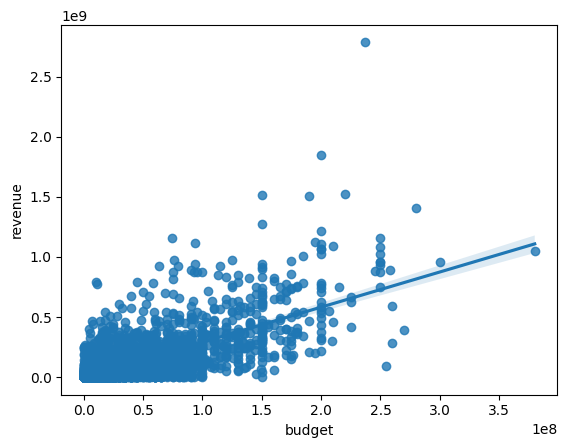

In [47]:
# Select and print top 5 budgeted movies and bottom 5
five_most_expensive = movies_df.nlargest(5, 'budget')[['original_title', 'budget']]
print(five_most_expensive)
five_least_expensive = movies_df.nsmallest(5, 'budget')[['original_title', 'budget']]
print(five_least_expensive)

# Create barplot with regression
sns.regplot( x = 'budget', y = 'revenue', data = movies_df)
    

<Axes: xlabel='budget', ylabel='popularity'>

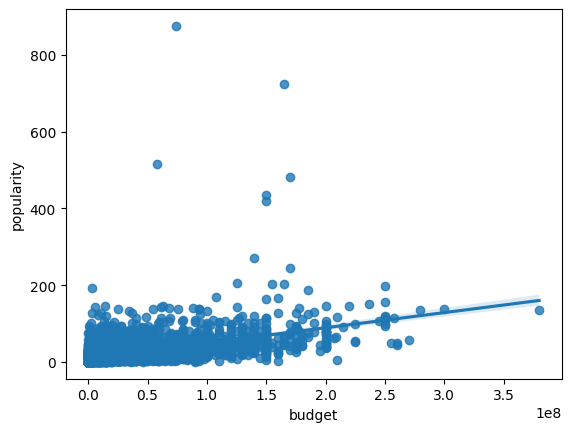

In [48]:
sns.regplot( x = 'budget', y = 'popularity', data = movies_df)

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

The five most profitable movies and the least profitable movies are below the code cell.

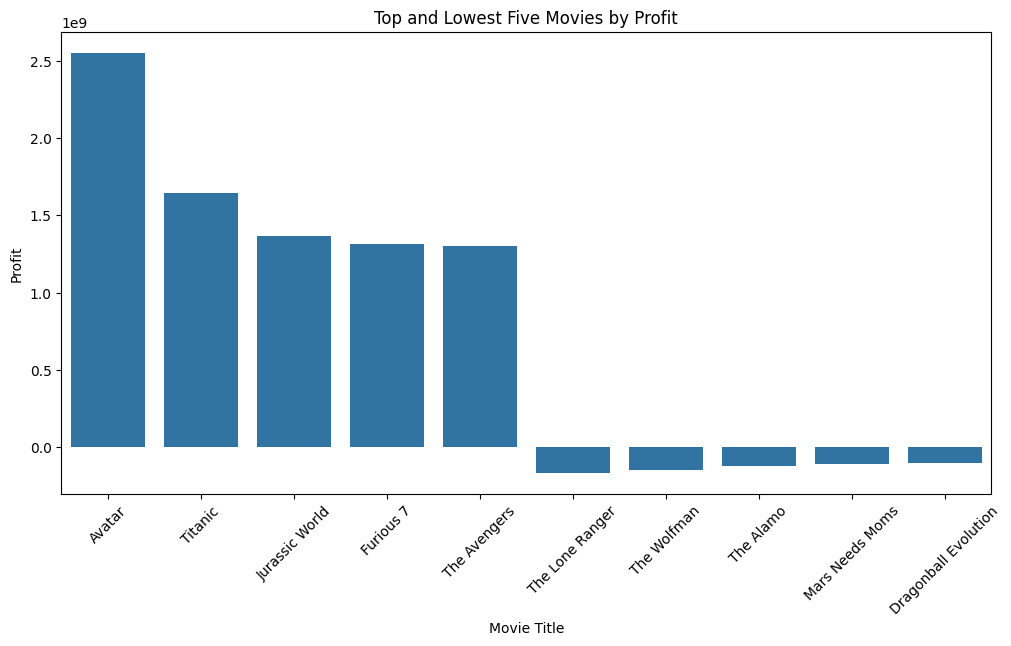

In [49]:
# Code here
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Get the top 5 highest and lowest movies by profit
top_five_profit = movies_df.nlargest(5, 'profit')
lowest_five_profit = movies_df.nsmallest(5, 'profit')

# Combine the two DataFrames
top_and_lowest_five_profit = pd.concat([top_five_profit, lowest_five_profit])

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='original_title', y='profit', data=top_and_lowest_five_profit)
plt.xticks(rotation=45)
plt.title('Top and Lowest Five Movies by Profit')
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.show()


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [50]:
# Sort dataframe by populairty 

popularirty_sorted_df = movies_df.sort_values(by = 'popularity', ascending = False)
five_most_pop = popularirty_sorted_df.head()

#### Find Movies which are rated above 7

In [51]:
# Sort movies where average vote is above 7 and print list 
filtered_above_seven = movies_df[movies_df['vote_average'] > 7]
list_of_great_titles = filtered_above_seven[['original_title', 'vote_average']]
print(list_of_great_titles[0:11])

                               original_title  vote_average
0                                      Avatar           7.2
3                       The Dark Knight Rises           7.6
6                                     Tangled           7.4
7                     Avengers: Age of Ultron           7.3
8      Harry Potter and the Half-Blood Prince           7.4
16                               The Avengers           7.4
19  The Hobbit: The Battle of the Five Armies           7.1
22        The Hobbit: The Desolation of Smaug           7.6
25                                    Titanic           7.5
26                 Captain America: Civil War           7.1
42                                Toy Story 3           7.6


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76],
 [Text(0, 0, "['Drama'"),
  Text(1, 0, " 'Thriller']"),
  Text(2, 0, "['Comedy'"),
  Text(3, 0, "['Action'"),
  Text(4, 0, " 'Romance']"),
  Text(5, 0, " 'Drama'"),
  Text(6, 0, " 'Comedy'"),
  Text(7, 0, " 'Drama']"),
  Text(8, 0, "['Drama']"),
  Text(9, 0, " 'Adventure'"),
  Text(10, 0, "['Adventure'"),
  Text(11, 0, " 'Action'"),
  Text(12, 0, " 'Science Fiction']"),
  Text(13, 0, "['Comedy']"),
  Text(14, 0, " 'Thriller'"),
  Text(15, 0, " 'Family']"),
  Text(16, 0, " 'Crime'"),
  Text(17, 0, " 'Crime']"),
  Text(18, 0, "['Horror'"),
  T

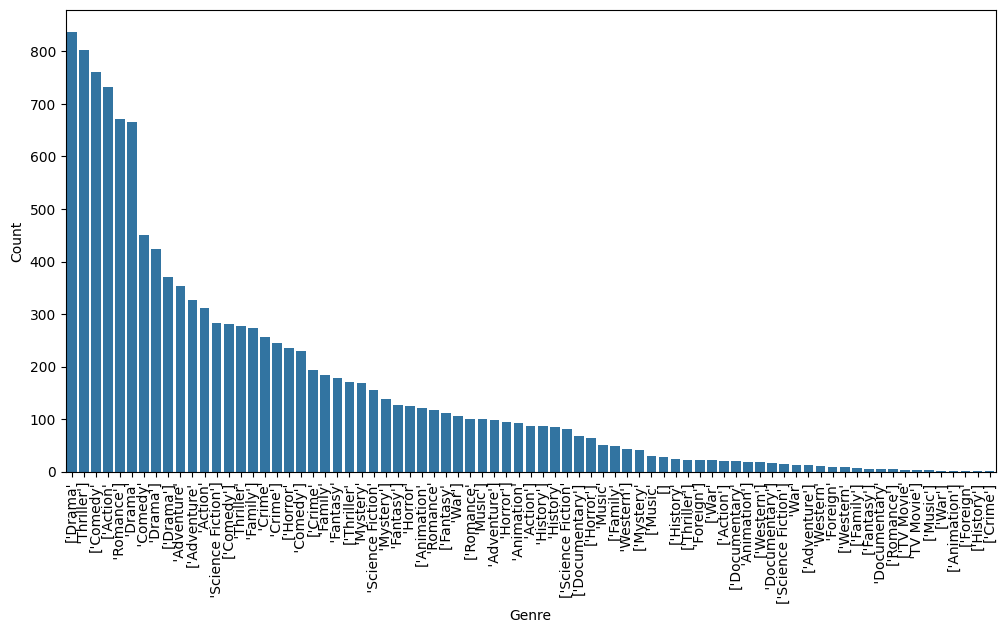

In [52]:
# Split genre columns to get rid of multiple genre categories
split_genres = movies_df['genres'].str.split(',')
exploded_movies = split_genres.explode()

# Get distribution of movies by genre 
genre_distribution = exploded_movies.value_counts().reset_index()
genre_distribution.columns = ['genres', 'count']

# Plot the distribution as a bar graph
plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'count', data = genre_distribution)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)


The first scatterplot graph below the code cell depicts vote count against vote average. The data indicates that most votes are made when the movie is above the average score of 5. A deducation that could be made here is that people who are happier about their movie are more likely to cast a vote for that movie. However, this conclusion could be skewed by the fact that more popular movies get more people watching them and therefore receive more votes. So the aformentioned conclusion should be taken lightly. 

The lineplot below its code cell indicates that the most profitable movies are just below 200 minutes in length which is useful information for anyone considering how long they should make their next blockbuster. 

The final lineplot graph below the last cell code depicts movie profits per year. There is a slight geenral trend for movies to increase in profits over time however there are events which spike the data throughout the timeline. one of these spikes is a spike downwards around 2020 and is so intense that it puts movies profits on par with profits made decades ago. The main cause of this spike was the lockdowns imposed when covid 19 rocked the world. These lockdowns meant that people weren't going to cinemas and therefore movies made less of profit. 

<Axes: xlabel='vote_average', ylabel='vote_count'>

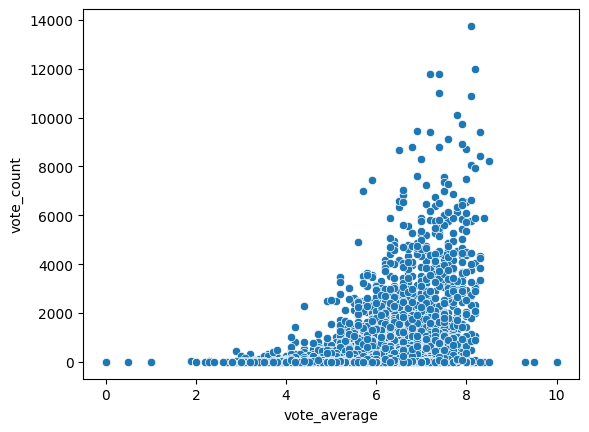

In [53]:
# Generate three different interesting visualisations with a data story.
sns.scatterplot(x = movies_df['vote_average'], y = movies_df['vote_count'])


<Axes: xlabel='runtime', ylabel='profit'>

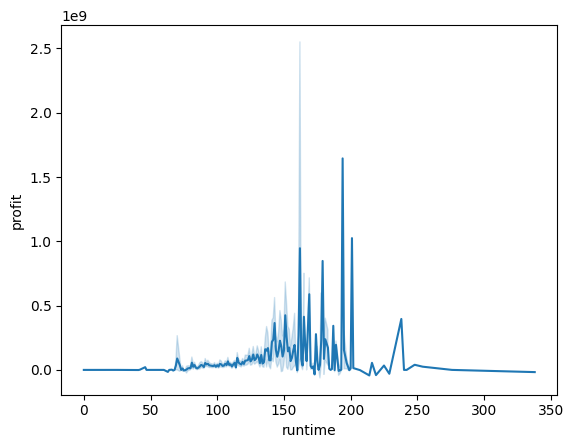

In [54]:
sns.lineplot(x = 'runtime', y = 'profit', data = movies_df)


<Axes: xlabel='release_year', ylabel='profit'>

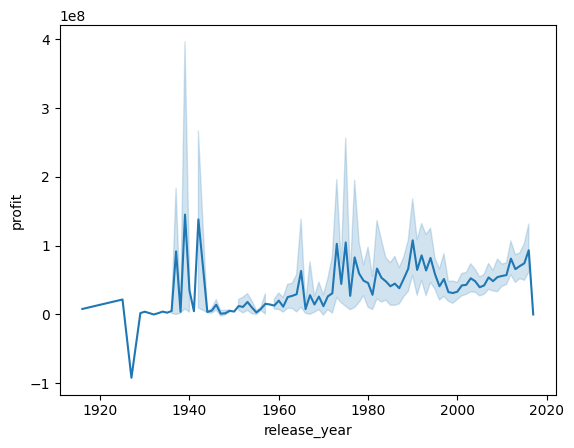

In [55]:
sns.lineplot(x = 'release_year', y = 'profit', data = movies_df)